#Question 1 Bias-Variance Tradeoff
##Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

In [4]:
Data=pd.read_csv('/content/drive/MyDrive/ID5055 assignments/Linear regression Tut/poly_reg2.csv')

In [5]:
Data.head()

,x,y
0,-5.0,-0.680180
1,-4.9,-1.104312
2,-4.8,-2.369426
3,-4.7,-2.581811
4,-4.6,-1.512829


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


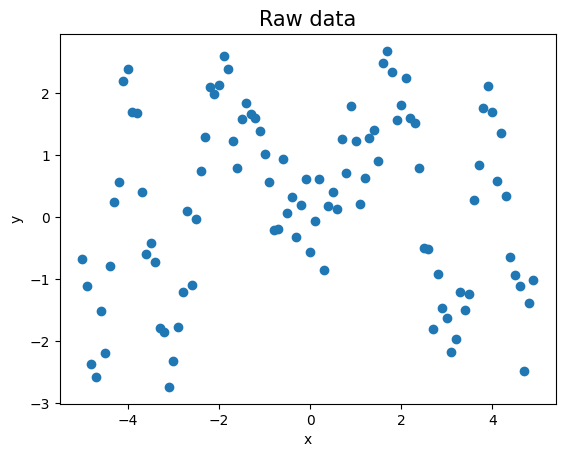

In [7]:
plt.scatter(Data['x'],Data['y'])
plt.title("Raw data",fontsize=15)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##Split the data

In [8]:
X_train,X_test,y_train,y_test=train_test_split(Data['x'].values,Data['y'].values,test_size=0.2,shuffle=True,random_state=42)

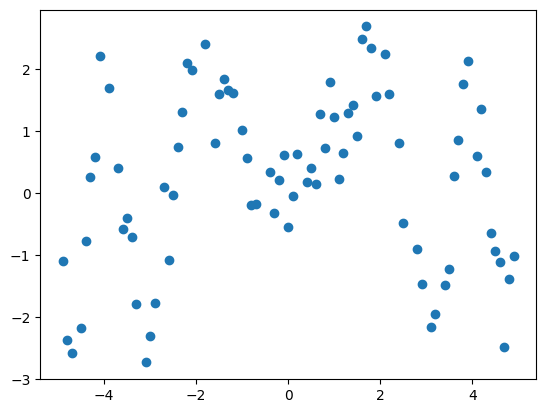

In [9]:
plt.scatter(X_train,y_train)

In [58]:
def reg(x_train,x_test,y_train,y_test,k=1):
  poly_train=PolynomialFeatures(degree=k,include_bias=False)
  poly_test=PolynomialFeatures(degree=k,include_bias=False)
  p_x_train=poly_train.fit_transform(x_train.reshape(-1,1))
  p_x_train=normalize(p_x_train)
  p_x_test=poly_test.fit_transform(x_test.reshape(-1,1))
  p_x_test=normalize(p_x_test)
  model=LinearRegression()
  model.fit(p_x_train,y_train)
  y_pred_train=model.predict(p_x_train)
  y_pred_test=model.predict(p_x_test)
  train_err=mean_squared_error(y_train,y_pred_train)
  test_err=mean_squared_error(y_test,y_pred_test)
  return y_pred_train,y_pred_test,train_err,test_err

In [59]:
Train_error=[]
Test_error=[]
Y_train_pred=[]
Y_test_pred=[]
numfeat=np.arange(1,31)
for i in numfeat:
  y_pred_train,y_pred_test,train_err,test_err=reg(X_train,X_test,y_train,y_test,k=i)
  Y_train_pred.append(y_pred_train)
  Y_test_pred.append(y_pred_test)
  Train_error.append(train_err)
  Test_error.append(test_err)

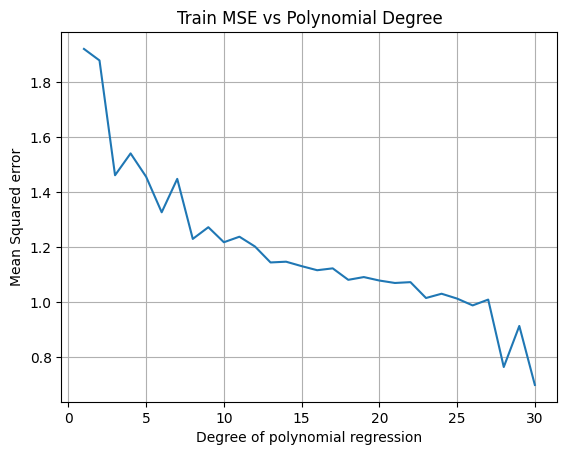

In [12]:
plt.plot(numfeat,Train_error)
plt.title("Train MSE vs Polynomial Degree")
plt.xlabel("Degree of polynomial regression")
plt.ylabel("Mean Squared error")
plt.grid()
plt.show()

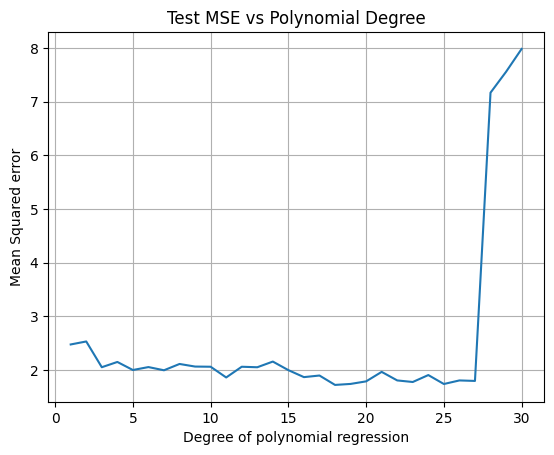

In [13]:
plt.plot(numfeat,Test_error)
plt.title("Test MSE vs Polynomial Degree")
plt.xlabel("Degree of polynomial regression")
plt.ylabel("Mean Squared error")
plt.grid()
plt.show()

In [73]:
idx=np.argmin(Test_error)
Num=numfeat[idx]
print(f"Minimum test set error of {Test_error[idx]:.2f} occurs at a degree of {Num}")
print(f"Train error at this feature is {Train_error[idx]:.2f}")

Minimum test set error of 1.72 occurs at a degree of 18
Train error at this feature is 1.08


In [69]:
y_train_pred=np.array(Y_train_pred[idx])

In [70]:
X=np.concatenate([X_train.reshape(-1,1),y_train_pred.reshape(-1,1)],axis=1)

In [71]:
A=X[X[:, 0].argsort()]

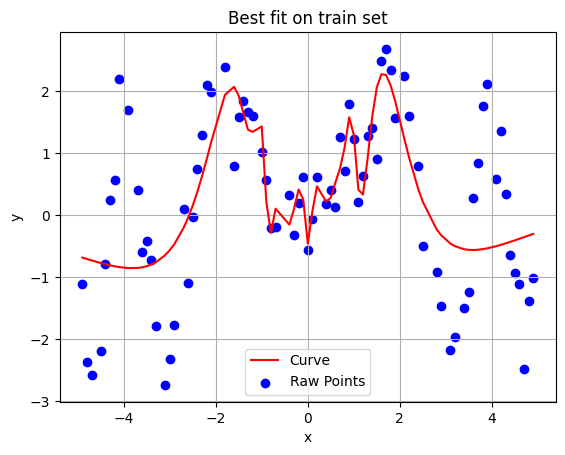

In [72]:
plt.plot(A[:,0],A[:,1],color='r',label='Curve')
plt.scatter(X_train,y_train,color='b',label='Raw Points')
plt.title("Best fit on train set")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()